# Stock Exhange Analysis

## Introduction
Data retrieved from https://www.kaggle.com/mattiuzc/stock-exchange-data, originally sourced from Yahoo Finance.

## Pre EDA Thoughts
- ML model would be some sort of regression and prediction model for the future, would be fun to compare predicted future outputs with actual results. As of writing this, the data is reported week-daily and goes up to May of 2021, which leaves three months to predict. 

- Could be interesting to test some sort of classification ML model, to predict if a value would fall under a specific index. Considering the varying stock values due to differing currencies, it may not be too difficult, but testing specifically under the indexes of the same currency or testing amongst all indexes on a normalized currency might be worth trying out.

- I am wary of creating a universally adjust currency unit due to the independently changing fluctuation by inflation that each of these currencies have. I am not sure it would be a helpful idea to adjust the Japanese Yen to an equal amount of USD unless I am going to compare the conversion rate on each individual day across each currency. For example, in July of 1998 1 USD == 144 JPY while in August of 2011 it was 1 USD == 76 JPY.
    - Perhaps normalizing the numbers could be helpful, at least in comparing how international markets would rise and fall together. 
    
- Will begin by cleaning data where needed, performing some EDA broken down by index, and some basic visualizations while brainstorming further advanced visualizations. 

- Not sure what to do with the Volume column of the dataframe, hopefully will feel inspiration later.
    

## Data

## Scope

## Conclusion

In [106]:
### Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
### Importing CSV file
stock_info_df = pd.read_csv("indexInfo.csv")
stock_info_df.columns = ["region", "exchange", 'index_name', "currency"]
stock_df_original = pd.read_csv("indexData.csv")
df_columns_adjusted = stock_df_original
df_columns_adjusted.columns = ["index_name", "date", "open", "high", "low", "close", "adj_close", "volume"]

In [108]:
### General coding related information about the overarching usability of the data

print("Number of rows: ", len(df_columns_adjusted))
print("Number of columns: ", len(df_columns_adjusted.columns))
print("\n")
print("Number of duplicate rows: ", df_columns_adjusted.duplicated().sum())
print("Number of null values:")
print(df_columns_adjusted.isnull().sum())
print("\n")
print("Data types for each column:")
print(df_columns_adjusted.dtypes)
print("\n")

### Descriptive information about the content of the Dataframe

print("Different Stock Indexes Represented:", df_columns_adjusted.index_name.nunique(), " unique")
print(df_columns_adjusted.index_name.unique().tolist())
print("\n")

print("Different Countries Represented:", stock_info_df.region.nunique(), " unique")
print(stock_info_df.region.unique().tolist())
print("\n")

print("Different Currencies Represented: ", stock_info_df.currency.nunique(), " unique")
print(stock_info_df.currency.unique().tolist())
print("\n")

print("___ALL STOCKS___")
display(df_columns_adjusted[["date","open","high","low","close","adj_close","volume"]].agg(["min", "max", "mean"]))
print("\n")


#Below I made a temp Dataframe for each index, by creating a list and iterating through each index in the list
stock_index_list = df_columns_adjusted.index_name.unique().tolist()
for stock_index in stock_index_list:
    temp_EDA_df = df_columns_adjusted[df_columns_adjusted.index_name == stock_index]
    
    #I also utilized the "stockInfo" file for description purposes
    print("---", stock_index, "---")
    print("Full Name: ", stock_info_df.loc[stock_info_df["index_name"] == stock_index]["exchange"].item())
    print("Region: ", stock_info_df.loc[stock_info_df["index_name"] == stock_index]["region"].item())
    print("Currency: ", stock_info_df.loc[stock_info_df["index_name"] == stock_index]["currency"].item())
    #Used the below line to check for a breakdown of what had the most null values
    #print("Null Values: ", temp_EDA_df.isnull().sum())
    
    #created an aggregate df to display some relevant numbers for each index
    display(temp_EDA_df.agg(['min','max', "mean"]))
    


    print("\n")


Number of rows:  112457
Number of columns:  8


Number of duplicate rows:  0
Number of null values:
index_name       0
date             0
open          2204
high          2204
low           2204
close         2204
adj_close     2204
volume        2204
dtype: int64


Data types for each column:
index_name     object
date           object
open          float64
high          float64
low           float64
close         float64
adj_close     float64
volume        float64
dtype: object


Different Stock Indexes Represented: 14  unique
['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI', 'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100']


Different Countries Represented: 12  unique
['United States', 'Hong Kong', 'China', 'Japan', 'Europe', 'Canada', 'India', 'Germany', 'Korea', 'Switzerland', 'Taiwan', 'South Africa']


Different Currencies Represented:  11  unique
['USD', 'HKD', 'CNY', 'JPY', 'EUR', 'CAD', 'INR', 'KRW', 'CHF', 'TWD', 'ZAR']


___ALL STOCKS___


,date,open,high,low,close,adj_close,volume
min,1965-01-05,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
max,2021-06-03,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10
mean,NaN,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09




--- NYA ---
Full Name:  New York Stock Exchange
Region:  United States
Currency:  USD


,index_name,date,open,high,low,close,adj_close,volume
min,NYA,1965-12-31,347.769989,347.769989,347.769989,347.769989,347.769989,0.000000e+00
max,NYA,2021-05-28,16590.429690,16685.890630,16531.949220,16590.429690,16590.429690,1.145623e+10
mean,NaN,NaN,4451.778151,4468.236552,4433.695014,4452.174711,4452.174711,1.215565e+09




--- IXIC ---
Full Name:  NASDAQ
Region:  United States
Currency:  USD


,index_name,date,open,high,low,close,adj_close,volume
min,IXIC,1971-02-05,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
max,IXIC,2021-05-28,14204.509770,14211.570310,14064.280270,14138.780270,14138.780270,1.110216e+10
mean,NaN,NaN,1985.026961,1998.050288,1969.984549,1984.906795,1984.906795,9.915283e+08




--- HSI ---
Full Name:  Hong Kong Stock Exchange
Region:  Hong Kong
Currency:  HKD


,index_name,date,open,high,low,close,adj_close,volume
min,HSI,1986-12-31,1950.500000,1950.500000,1894.900024,1894.900024,1894.900024,0.000000e+00
max,HSI,2021-05-31,33335.480470,33484.078130,32897.039060,33154.121090,33154.121090,9.799120e+09
mean,NaN,NaN,15206.355607,15303.626762,15091.048791,15200.605629,15200.605629,8.430191e+08




--- 000001.SS ---
Full Name:  Shanghai Stock Exchange
Region:  China
Currency:  CNY


,index_name,date,open,high,low,close,adj_close,volume
min,000001.SS,1997-07-02,1007.901001,1019.921997,998.228027,1011.499023,1011.499023,0.000000e+00
max,000001.SS,2021-05-31,6057.428223,6124.043945,6040.712891,6092.057129,6092.057129,1.006520e+07
mean,NaN,NaN,2381.208888,2402.121747,2358.947043,2383.069135,2383.069135,1.065404e+05




--- GSPTSE ---
Full Name:  Toronto Stock Exchange
Region:  Canada
Currency:  CAD


,index_name,date,open,high,low,close,adj_close,volume
min,GSPTSE,1979-06-29,1352.000000,1352.000000,1332.199951,1346.400024,1342.980957,0.000000e+00
max,GSPTSE,2021-05-31,19905.800780,19909.599610,19841.000000,19852.199220,19852.199220,9.440374e+10
mean,NaN,NaN,8091.106543,8128.025943,8048.288132,8090.066305,8088.084509,9.620499e+09




--- 399001.SZ ---
Full Name:  Shenzhen Stock Exchange
Region:  China
Currency:  CNY


,index_name,date,open,high,low,close,adj_close,volume
min,399001.SZ,1997-08-22,2533.270020,2586.020020,2521.080078,2534.719971,2534.69165,0.000000e+00
max,399001.SZ,2021-06-02,19554.580080,19600.029300,19203.109380,19531.150390,19530.93164,3.635400e+06
mean,NaN,NaN,7968.340421,8052.905487,7882.030536,7973.831005,7973.75866,2.500271e+05




--- NSEI ---
Full Name:  National Stock Exchange of India
Region:  India
Currency:  INR


,index_name,date,open,high,low,close,adj_close,volume
min,NSEI,2007-09-17,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
max,NSEI,2021-05-31,15437.750000,15606.349610,15394.750000,15582.799810,15582.799810,1.811000e+06
mean,NaN,NaN,7665.751273,7712.532773,7605.887145,7660.047238,7660.047238,1.830719e+05




--- GDAXI ---
Full Name:  Frankfurt Stock Exchange
Region:  Germany
Currency:  EUR


,index_name,date,open,high,low,close,adj_close,volume
min,GDAXI,1987-12-30,936.00000,936.000000,936.000000,936.000000,936.000000,0.000000e+00
max,GDAXI,2021-05-31,15548.29004,15568.599610,15465.089840,15519.980470,15519.980470,5.101956e+08
mean,NaN,NaN,5915.54922,5956.941632,5869.720949,5914.846717,5914.846717,6.830384e+07




--- KS11 ---
Full Name:  Korea Exchange
Region:  Korea
Currency:  KRW


,index_name,date,open,high,low,close,adj_close,volume
min,KS11,1996-12-11,283.410004,291.010010,277.369995,280.000000,280.000000,3.016000e+03
max,KS11,2021-06-01,3239.919922,3266.229980,3203.250000,3249.300049,3249.300049,3.455500e+06
mean,NaN,NaN,1489.814704,1499.141995,1478.324080,1489.145147,1489.145147,4.190849e+05




--- SSMI ---
Full Name:  SIX Swiss Exchange
Region:  Switzerland
Currency:  CHF


,index_name,date,open,high,low,close,adj_close,volume
min,SSMI,1990-11-09,1288.699951,1296.599976,1279.000000,1287.599976,1287.599976,0.000000e+00
max,SSMI,2021-05-31,11345.400390,11443.969730,11326.750000,11426.150390,11426.150390,3.467677e+08
mean,NaN,NaN,6410.012762,6448.342905,6369.483406,6409.733078,6409.733078,3.646631e+07




--- TWII ---
Full Name:  Taiwan Stock Exchange
Region:  Taiwan
Currency:  TWD


,index_name,date,open,high,low,close,adj_close,volume
min,TWII,1997-07-02,3475.870117,3511.379883,3411.679932,3446.260010,3446.247070,0.000000e+00
max,TWII,2021-05-31,17646.929690,17709.230470,17548.300780,17595.900390,17595.900390,1.499950e+07
mean,NaN,NaN,8037.662438,8082.502931,7980.862418,8028.866141,8028.844382,2.457311e+06




--- J203.JO ---
Full Name:  Johannesburg Stock Exchange
Region:  South Africa
Currency:  ZAR


,index_name,date,open,high,low,close,adj_close,volume
min,J203.JO,2012-02-08,32887.449220,33160.371090,32730.919920,32887.449220,32887.449220,0.0
max,J203.JO,2021-05-31,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,0.0
mean,NaN,NaN,50896.729912,51220.236232,50589.752451,50910.945859,50910.945859,0.0




--- N225 ---
Full Name:  Tokyo Stock Exchange
Region:  Japan
Currency:  JPY


,index_name,date,open,high,low,close,adj_close,volume
min,N225,1965-01-05,1020.489990,1020.489990,1020.489990,1020.489990,1020.489990,0.000000e+00
max,N225,2021-06-03,38921.648440,38957.441410,38827.710940,38915.871090,38915.871090,5.952000e+08
mean,NaN,NaN,12852.286239,12919.694377,12778.636383,12849.155197,12849.155197,3.976289e+07




--- N100 ---
Full Name:  Euronext
Region:  Europe
Currency:  EUR


,index_name,date,open,high,low,close,adj_close,volume
min,N100,1999-12-31,427.600006,436.519989,419.489990,419.950012,419.950012,0.000000e+00
max,N100,2021-06-02,1258.489990,1265.660034,1258.239990,1263.619995,1263.619995,1.159639e+09
mean,NaN,NaN,822.261348,826.810234,817.177209,822.153719,822.153719,1.958226e+08


In [109]:
### Creating cleaned and broken down dataframes


### Removing duplicates
df_duplicates_dropped = df_columns_adjusted.dropna()

### Merging info and data dataframes
df_merged = pd.merge(df_duplicates_dropped, stock_info_df, how="left", on="index_name")

### Leaving space below to create dataframes for normalized prices based on currency

### Leaving space below to create new dataframes based on region, currency, or index
nya_df = df_merged[df_merged["index_name"] == "NYA"]


In [110]:
df_merged

,index_name,date,open,high,low,close,adj_close,volume,region,exchange,currency
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,United States,New York Stock Exchange,USD
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,United States,New York Stock Exchange,USD
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,United States,New York Stock Exchange,USD
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,United States,New York Stock Exchange,USD
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,United States,New York Stock Exchange,USD
...,...,...,...,...,...,...,...,...,...,...,...
110248,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,Europe,Euronext,EUR
110249,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,Europe,Euronext,EUR
110250,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,Europe,Euronext,EUR
110251,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,Europe,Euronext,EUR


In [111]:
def Feature_Frequency_Bar(data_f, colorbar, fignum, dropnum):
    sns.set_style("darkgrid")
    sns.set_context("talk")

    pct_index_df = df_merged[data_f].value_counts().reset_index()
    pct_index_df["percentage"] = pct_index_df.apply(lambda x: x[data_f]/sum(pct_index_df[data_f])*100, axis=1).round(decimals=2)
    pct_index_df.columns = [data_f, "counts", "percentage"]

    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.barplot(x=data_f, y="counts", data=pct_index_df, palette=colorbar)
    plt.xlabel(data_f.title(), labelpad=20)
    plt.ylabel("Count")
    plt.title("Frequency of Each {} in the Data".format(data_f.title()), fontsize=25, pad=10)

    i=0
    for p in ax.patches:
        if i < 3:
            ax.text(x = p.get_x() + p.get_width() / 2, 
                y = p.get_height() - dropnum,
                s = str(pct_index_df.percentage[i])+"%", 
                ha = 'center',
                color = 'white')
        else:
            ax.text(x = p.get_x() + p.get_width() / 2, 
                y = p.get_height() - dropnum,
                s = str(pct_index_df.percentage[i])+"%", 
                ha = 'center',
                color = 'black')
            
        i+=1
    
    plt.figtext(.01, .01, "Figure 1.{}".format(fignum), fontsize=15, fontstyle="italic")
    
    plt.show()

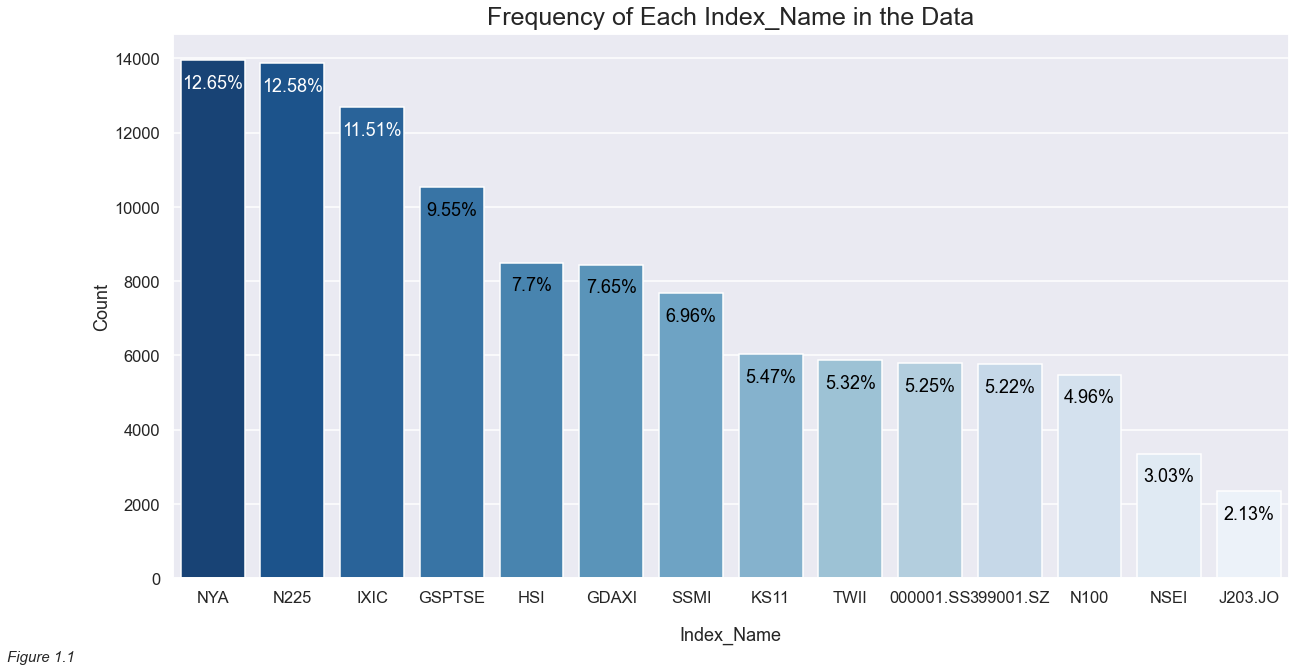

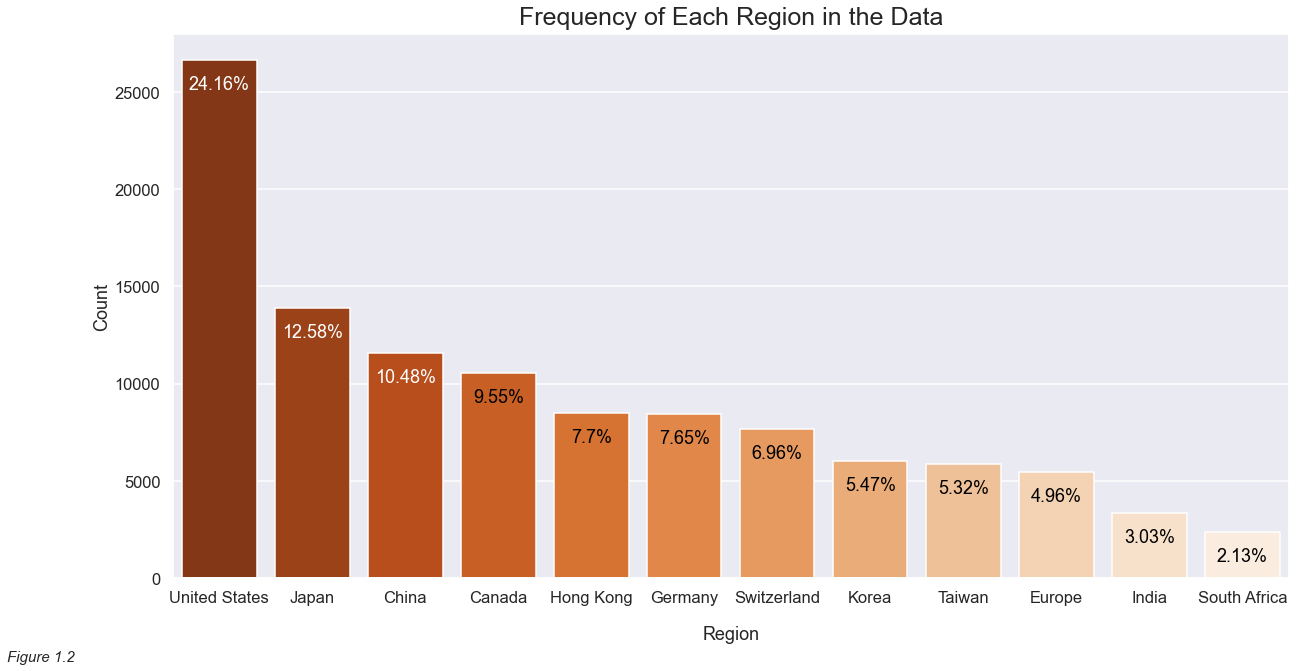

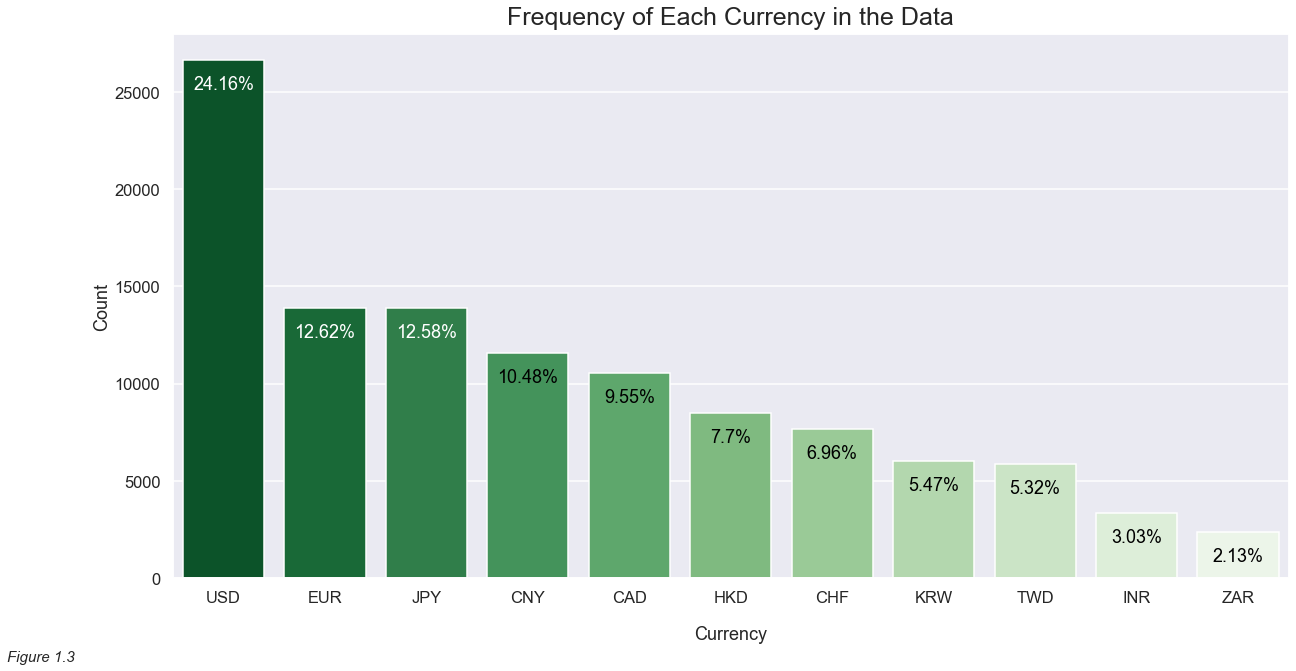

In [112]:
Feature_Frequency_Bar("index_name", "Blues_r", 1, 750)
Feature_Frequency_Bar("region", "Oranges_r", 2, 1500)
Feature_Frequency_Bar("currency", "Greens_r", 3, 1500)


In [113]:
### Next, need to create a filtered df that shows average open/close for each individual index for each month?/year?
### and find ways to represent that information on a line plot... The below link is tips on doing that

#https://www.delftstack.com/howto/python-pandas/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/